### Name: Syed Asghar Abbas Zaidi
### ID: 07201

# healthcare-stroke-data-1.csv

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import pandas as pd
df = pd.read_csv('healthcare-stroke-data-1.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,fat_percentage,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,43.13,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,41.20,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,36.35,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,30.77,never smoked


Q1. Display the data types of each column

In [18]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
fat_percentage       float64
smoking_status        object
dtype: object

Q2. Find the columns with missing values by displaying the total number of records for each column.

In [21]:
df.shape

(5110, 12)

In [23]:
df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
fat_percentage       4909
smoking_status       5110
dtype: int64

### Are there any duplicates? 

In [59]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


In [62]:
sum(df.duplicated())

0

In [65]:
df2 = df.drop_duplicates()

Q3. If there are missing values in any column, replace it with appropriate method of your choice. Explain why did you choose this method? Display the missing value again to show that there are no missing values exist

## Basic guideline with which I will be handling the data-cleaning e.t.c.
If you have 2%, 3% or 5% of missing values, then you drop those rows which contains those values, that's an industry rule of thumb.
But if you have 5% or more than 10% of missing value, then you can "think" of filling them 
However, if it's 20% then you are losing a lot of information. You might consider dropping the entire column, cause if you try filling it, the results might be too skewed


For categorical, use mode. For Numerical, use mean. For ordinal numerical, use median (or mode if situation calls for it)

In [67]:
df2.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
fat_percentage       201
smoking_status         0
dtype: int64

In [70]:
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df = pd.DataFrame({'column_name': df2.columns,
                                 'percent_missing': percent_missing}).round(2).sort_values(by='percent_missing',ascending=False).reset_index(drop=True)
missing_value_df

,column_name,percent_missing
0,bmi,3.93
1,fat_percentage,3.93
2,id,0.00
3,gender,0.00
4,age,0.00
5,hypertension,0.00
6,heart_disease,0.00
7,ever_married,0.00
8,work_type,0.00
9,Residence_type,0.00


In [81]:
# If you wanna drop columns, df3 = df2.drop(['RC','NJ_number','NP'], axis=1)
# if you wanna fill with mean df3['pace'] = df3['pace'].fillna(df['pace'].mean())
# df3['joined'] = df3['joined'].fillna(df['joined'].mode()[0])
# after filling all values we can do this to drop rows
df3 = df2.dropna()
df3.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
fat_percentage       0
smoking_status       0
dtype: int64

Q4. Replace the **'?'** present in the **smoking_status** column with the label **'unknown'**

In [101]:
df3['smoking_status'].head(10)
# df3['smoking_status'] = df3['smoking_status'].replace('?', 'unknown')
# loc is a more safer way, iloc is indexing focused.
df3.loc[:, 'smoking_status'] = df3['smoking_status'].replace('?', 'unknown')


In [103]:
df3['smoking_status'].head(20)

0     formerly smoked
2        never smoked
3              smokes
4        never smoked
5     formerly smoked
6        never smoked
7        never smoked
9             unknown
10       never smoked
11             smokes
12             smokes
14       never smoked
15       never smoked
16             smokes
17             smokes
18       never smoked
20             smokes
21       never smoked
22       never smoked
23            unknown
Name: smoking_status, dtype: object

Q5. Find the percentage of Females present in the column gender

In [146]:
Female = df3['gender'].value_counts().get('Female',0)
Total_Counts = df3['gender'].count()
Percentage = (Female/Total_Counts) * 100
Percentage

59.014055815848444

Q6. Find all the records which have avg_glucose_level greater than 200

In [154]:
gt_200_col = df3['avg_glucose_level'] > 200
High_Glucose_Records = df3[gt_200_col]
High_Glucose_Records

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,fat_percentage,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,43.13,formerly smoked
14,5317,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,35.81,never smoked
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,32.01,smokes
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,54.44,never smoked
22,68794,Female,79.0,0,0,Yes,Self-employed,Urban,228.70,26.6,33.89,never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
5029,66951,Female,72.0,0,0,Yes,Private,Urban,206.49,26.3,31.92,never smoked
5034,65405,Female,79.0,0,0,No,Private,Urban,253.86,28.8,36.53,formerly smoked
5035,49773,Female,78.0,0,0,Yes,Private,Urban,203.36,28.7,36.18,formerly smoked
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,31.99,never smoked


Q7. What is the Average bmi of people whose smoking_status shows **never smoked**?

In [160]:
# Filter records where smoking_status is 'never smoked', Short way of doing what we did above
never_smoked = df3[df3['smoking_status'] == 'never smoked']
# Calculate the average BMI of the filtered records
average_bmi_never_smoked = never_smoked['bmi'].mean()
# Display the result
print(f"Average BMI of people who never smoked: {average_bmi_never_smoked:.2f}")

Average BMI of people who never smoked: 29.98


Q8. Find the Max avg_glucose level and Min avg_glucose level record for the people whose smoking_status shows **smokes** 

In [170]:
# Assuming 'df' is your DataFrame and it has 'smoking_status' and 'avg_glucose_level' columns
# Filter records where smoking_status is 'smokes'
smokers = df3[df3['smoking_status'] == 'smokes']
# Find the record with the maximum avg_glucose_level
max_glucose_record = smokers[smokers['avg_glucose_level'] == smokers['avg_glucose_level'].max()]
# Find the record with the minimum avg_glucose_level
min_glucose_record = smokers[smokers['avg_glucose_level'] == smokers['avg_glucose_level'].min()]

# Display the results
print("Record with Max avg_glucose_level for smokers:")
print(max_glucose_record)

Record with Max avg_glucose_level for smokers:
        id gender   age  hypertension  heart_disease ever_married work_type  \
193  69112   Male  68.0             1              1          Yes   Private   

    Residence_type  avg_glucose_level   bmi  fat_percentage smoking_status  
193          Rural             271.74  31.1           36.76         smokes  


In [172]:
print("\nRecord with Min avg_glucose_level for smokers:")
print(min_glucose_record)


Record with Min avg_glucose_level for smokers:
        id gender   age  hypertension  heart_disease ever_married  \
659  50491   Male  78.0             0              0          Yes   

         work_type Residence_type  avg_glucose_level   bmi  fat_percentage  \
659  Self-employed          Urban              55.32  29.6           37.26   

    smoking_status  
659         smokes  


Q9. Use any visualization technique (think of any suitable plot) which can justify/show that "As the fat_percentage increases, the bmi also increases proportionally". Explain your findings in that plot.

Q10. Generate a correlation plot and validate the results of previous question. Explain how do you validate it?

Q11. Also find another interesting insights from correlation plot (other than fat_percentage and bmi)

Q12. Use a boxplot visualisation technique to see the highest and lowest **fat_percentage** with the marital status (**ever_married**)?

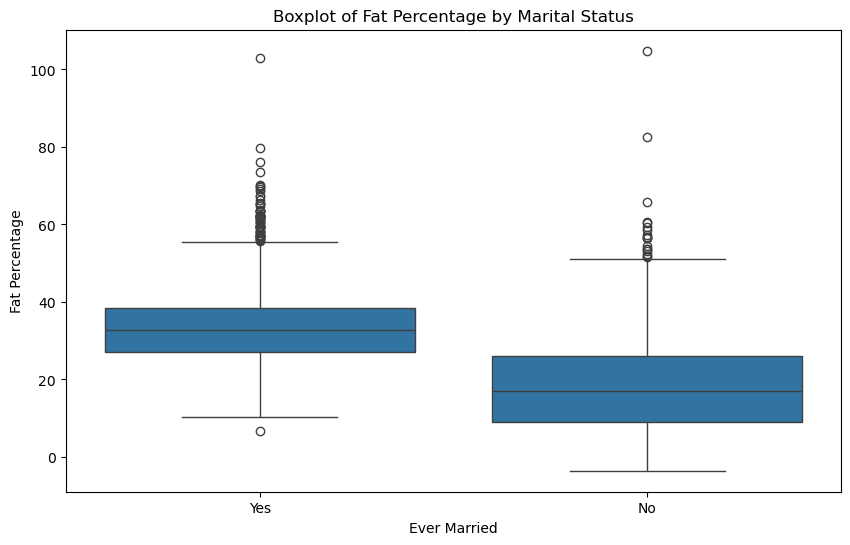

In [180]:
# Example: Creating a boxplot for fat_percentage based on ever_married
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='ever_married', y='fat_percentage', data=df3)

# Add titles and labels
plt.title('Boxplot of Fat Percentage by Marital Status')
plt.xlabel('Ever Married')
plt.ylabel('Fat Percentage')

# Show the plot
plt.show()

# healthcare-stroke-data-2.csv

Q13. Join second dataset with first dataset to include the **stroke** column. Find the common column to merge these datasets.

In [188]:
df_2 = pd.read_csv('healthcare-stroke-data-2.csv')
df_2.head(10)

,id,stroke
0,67,0
1,77,0
2,84,0
3,91,0
4,99,0
5,121,0
6,129,0
7,132,0
8,156,0
9,163,0


In [246]:
df3.shape# Merge the datasets on the 'id' column

(4909, 12)

In [228]:
df_2.shape

(5110, 2)

In [252]:
# merged_df = pd.merge(df3, df_2[['id', 'stroke']], on='id', how='inner')
merged_df = pd.merge(df3, df_2[['id', 'stroke']], on='id', how='left') #this ensures even if some columns aren't matched, we just keep null

# Display the merged DataFrame
merged_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,fat_percentage,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,43.13,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,41.20,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,36.35,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,30.77,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,37.23,formerly smoked,1


In [250]:
merged_df.shape

(4909, 13)

Q14. Count the number of records for each **stroke** type

In [254]:
merged_df['stroke'].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

Q15. Replace stroke = 0 to 'No' and stroke = 1 to 'Yes' categories. Count the values again to check if it matches with the previous question

In [260]:
# Replace 0 with 'No' and 1 with 'Yes' in the stroke column
merged_df['stroke'] = merged_df['stroke'].replace({0: 'No', 1: 'Yes'})

# Count the number of records for each stroke type again
stroke_counts_updated = merged_df['stroke'].value_counts()

# Display the updated counts
print(stroke_counts_updated)


stroke
No     4700
Yes     209
Name: count, dtype: int64


Q16. Make a Distribution plot for **age** and **stroke** together and provide insights on it.

Q17. Make a Distribution plot for **work_type** and **stroke** together and provide insights on it.

Q18. Find the number of patients for each **gender** and **work_type**. Sort them in ascending order.

Q19. Test the Hypothesis and explain your findings: <br> H0: the fat_percentage of **stroke** = Yes and **stroke** = No is same (equal or similar). <br>
Ha: the fat_percentage of **stroke** = Yes is greater than **stroke** = No <br>

In [288]:
from scipy import stats
fat_percentage_yes = merged_df[merged_df['stroke'] == 'Yes']['fat_percentage']
fat_percentage_no = merged_df[merged_df['stroke'] == 'No']['fat_percentage']
stats.ttest_ind(fat_percentage_yes, fat_percentage_no, alternative="greater", equal_var = False)

TtestResult(statistic=14.892107306732585, pvalue=4.110803319078326e-37, df=263.5963838539287)

Q20. Test the Hypothesis and explain your findings: <br> H0: **gender** and **stroke** are independent and are not related to each other <br>
Ha: **gender** and **stroke** are dependent and related to each other <br>